In [2]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import os
import seaborn as sns

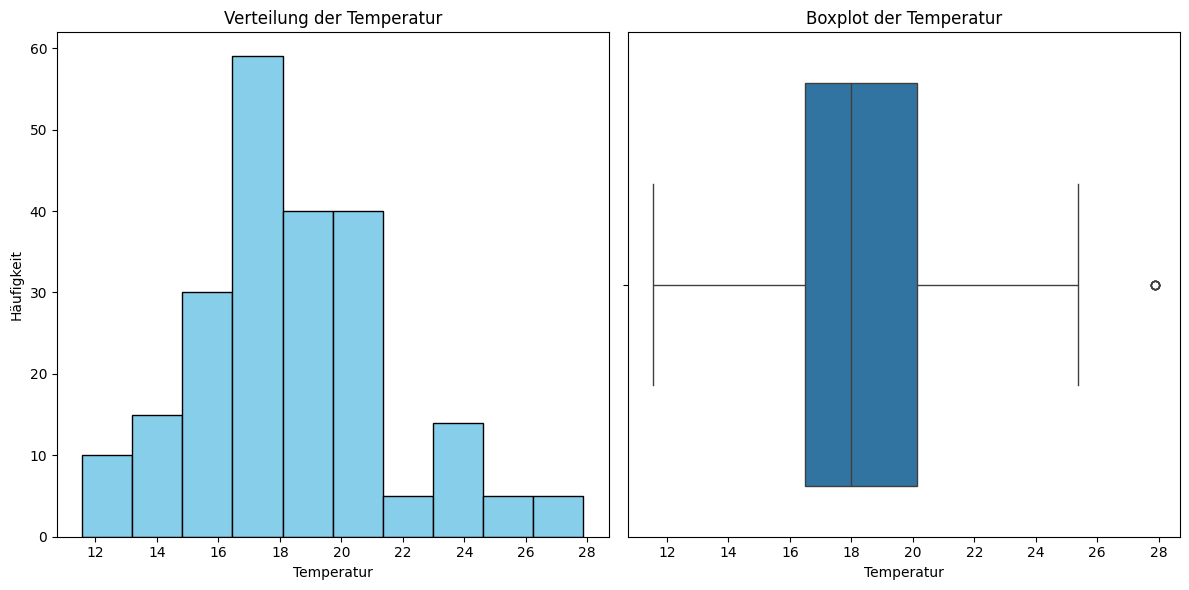

In [9]:
# DataFrame laden
df = pd.read_csv("data/zusammengefuehrt.csv")

# Erstellen eines Figures mit 1 Zeile und 2 Spalten
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # (1 Zeile, 2 Spalten)

# Histogramm auf dem ersten Subplot (axs[0])
axs[0].hist(df['Temperatur'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Verteilung der Temperatur')
axs[0].set_xlabel('Temperatur')
axs[0].set_ylabel('Häufigkeit')

# Boxplot auf dem zweiten Subplot (axs[1])
sns.boxplot(x=df['Temperatur'], ax=axs[1])
axs[1].set_title('Boxplot der Temperatur')

# Layout anpassen, um Überlappungen zu vermeiden
plt.tight_layout()

# Plot anzeigen
plt.show()


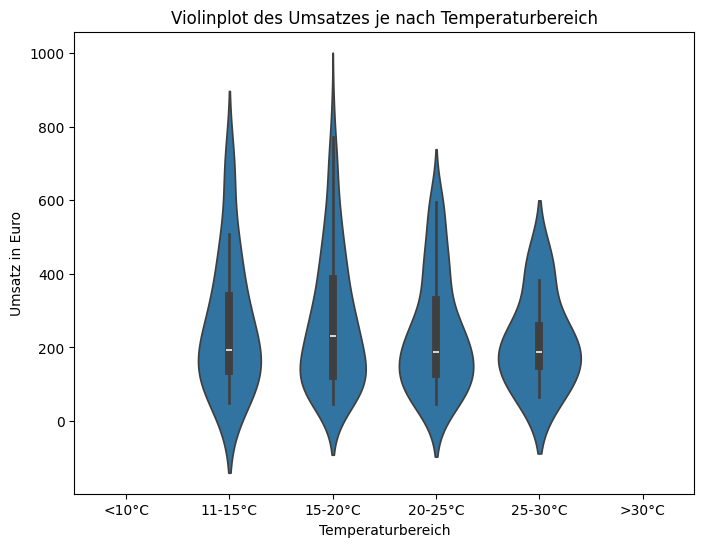

In [28]:
# DataFrame laden
df = pd.read_csv("data/zusammengefuehrt.csv")

# Stelle sicher, dass die 'Temperatur' Spalte existiert
if 'Temperatur' in df.columns:
    # Erstelle eine neue Spalte 'Temperaturbereich' basierend auf den Temperaturwerten
    df['Temperaturbereich'] = pd.cut(df['Temperatur'], bins=[-float('inf'), 10, 15, 20, 25, 30, float('inf')],
                                     labels=['<10°C', '11-15°C', '15-20°C','20-25°C', '25-30°C', '>30°C'])
else:
    print("Die Spalte 'Temperatur' existiert nicht im DataFrame.")

# Violinplot der Umsätze in den Temperaturbereichen
plt.figure(figsize=(8, 6))
sns.violinplot(x='Temperaturbereich', y='Umsatz', data=df)
plt.title('Violinplot des Umsatzes je nach Temperaturbereich')
plt.xlabel('Temperaturbereich')
plt.ylabel('Umsatz in Euro')
plt.show()

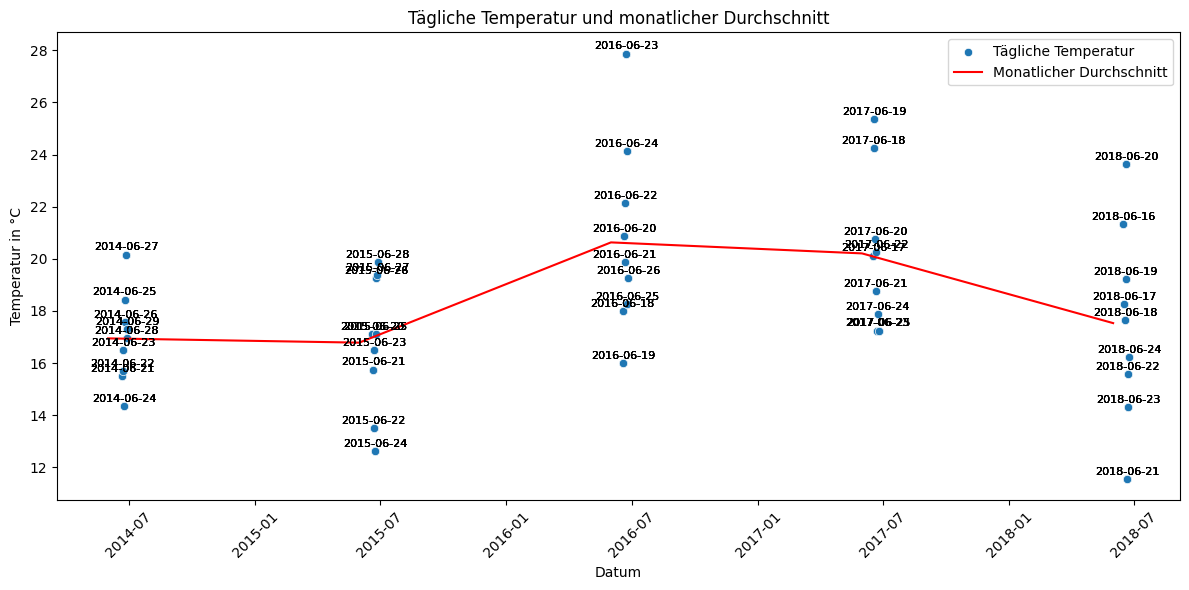

In [ ]:
df = pd.read_csv("data/zusammengefuehrt.csv")

df['Datum'] = pd.to_datetime(df['Datum'])
df['Monat'] = df['Datum'].dt.to_period('M')

# Berechne den monatlichen Durchschnitt der Temperatur
monatliche_durchschnittstemperatur = df.groupby('Monat')['Temperatur'].mean().reset_index()

# Plotten der täglichen Temperatur (Scatterplot)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Datum'], y=df['Temperatur'], color='tab:blue', label='Tägliche Temperatur')

# Durchgehende Linie für den monatlichen Durchschnitt
plt.plot(monatliche_durchschnittstemperatur['Monat'].dt.to_timestamp(), monatliche_durchschnittstemperatur['Temperatur'], color='red', label='Monatlicher Durchschnitt')

# An den Punkten den jeweiligen Tag hinzufügen
for i in range(len(df)):
    plt.annotate(df['Datum'][i].strftime('%Y-%m-%d'),  # Formatiere das Datum als String
                 (df['Datum'][i], df['Temperatur'][i]),  # Position des Textes
                 textcoords="offset points",  # Text relativ zu den Punkten verschieben
                 xytext=(0, 3),  # Verschiebung des Textes (5 Punkte nach oben)
                 ha='center',  # Horizontal ausrichten
                 fontsize=8,  # Schriftgröße
                 color='black')  # Textfarbe

plt.title('Tägliche Temperatur und monatlicher Durchschnitt')
plt.xlabel('Datum')
plt.ylabel('Temperatur in °C')

# X-Achse formatieren (Drehung der Datumsbeschriftung)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()